# Import dependencies

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Load Data

In [2]:
data_embed = pd.read_csv("./term_embeddings/vectorized_term_embeddings_4k.csv")
data_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.235717,-0.034357,0.059340,0.297741,0.413503,-0.005965,0.053272,-0.109700,0.191787,0.184964,...,0.222023,-0.038877,-0.471914,0.768315,-0.488685,0.120664,0.782061,-0.179443,-0.428450,0.461683
1,-0.178516,0.002904,0.131155,0.332376,0.247463,0.099109,-0.000515,0.026755,0.152213,0.175770,...,0.283444,-0.155591,-0.345533,0.806833,-0.311759,0.207827,0.600389,-0.149813,-0.418629,0.541288
2,-0.330687,-0.031855,0.105278,0.078271,0.195134,-0.136877,0.117263,-0.054845,0.206244,0.265202,...,0.215846,-0.030670,-0.520877,0.729626,-0.386960,0.177576,0.676565,-0.328219,-0.565267,0.506224
3,-0.281114,-0.042354,0.105358,0.152034,0.230870,-0.142952,0.144465,-0.065642,0.168137,0.245674,...,0.188485,-0.022974,-0.496699,0.746730,-0.406173,0.157490,0.685346,-0.276632,-0.548756,0.495335
4,-0.304600,-0.016233,0.152511,0.173860,0.161872,-0.073577,0.122591,-0.008369,0.165817,0.273474,...,0.204433,-0.045393,-0.448815,0.680492,-0.389678,0.141336,0.665190,-0.325107,-0.504376,0.517802


In [3]:
all_data = pd.read_csv(
    "../tests_17_ann_and_terms/article_v2_2_term_var_to_best_strategy/prepare_data/data_steps/steps_vars_term_str.csv",
    delimiter=',')

# leave only unique terms
print(f"Count all terms: {len(all_data)}")

print(f"max RI steps count: {max(all_data['RI_steps_num'])}")
print(f"max LO steps count: {max(all_data['LO_steps_num'])}")

# RI == LO -> 0
# RI > LO -> 1
# RI < LO -> 2
class_RI_LO = ["RI = LO" if los == ris else "RI < LO" if ris < los else "LO < RI" for los, ris in
               zip(all_data["LO_steps_num"].tolist(), all_data["RI_steps_num"].tolist())]

print(f"Count terms data samples: {len(class_RI_LO)}")

Count all terms: 4282
max RI steps count: 1000
max LO steps count: 219
Count terms data samples: 4282


# Some additional functions

In [4]:
pca = PCA(n_components=2)  # Set the number of components as needed
principal_components = pca.fit_transform(data_embed)

tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(data_embed)


def visualize_clusters(model_, clustering_method):
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['class'] = model_.labels_

    # Plot the PCA results with colorization based on the 'class' column
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, palette="deep")
    plt.title(f'PCA results of {clustering_method}')
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.legend()
    plt.show()

    tsne_df = pd.DataFrame(data=embedded_data, columns=['Dim 1', 'Dim 2'])
    tsne_df['class'] = model_.labels_

    # Plot the PCA results with colorization based on the 'class' column
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Dim 1', y='Dim 2', hue='class', data=tsne_df, palette="deep")
    plt.title(f't-SNE results of {clustering_method}')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.legend()
    plt.show()

In [5]:
pca_3d = PCA(n_components=3)  # Set the number of components as needed
principal_components_3d = pca_3d.fit_transform(data_embed)

tsne_3d = TSNE(n_components=3, random_state=42)
embedded_data_3d = tsne_3d.fit_transform(data_embed)


def visualize_clusters_3d_pca(model_, clustering_method):
    pca_df_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])
    pca_df_3d['class'] = [f"{x_}" for x_ in list(model_.labels_)]

    fig = px.scatter_3d(
        pca_df_3d, x='PC1', y='PC2', z='PC3',
        color='class', title=f"PCA 3D, {clustering_method}",
    )

    fig.update_traces(marker=dict(size=2))
    fig.show()


def visualize_clusters_3d_tsne(model_, clustering_method):
    tsne_df_3d = pd.DataFrame(data=embedded_data_3d, columns=["Dim 1", "Dim 2", "Dim 3"])
    tsne_df_3d['class'] = [f"{x_}" for x_ in list(model_.labels_)]

    fig = px.scatter_3d(
        tsne_df_3d, x='Dim 1', y='Dim 2', z='Dim 3',
        color='class', title=f"t-SNE 3D, {clustering_method}",
    )

    fig.update_traces(marker=dict(size=2))
    fig.show()

In [6]:
def draw_metrics(num_clusters, metric_cluster_vals, xlabel="Num clusters", ylabel="Metric", title="Clustering Method"):
    plt.plot(num_clusters, metric_cluster_vals)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} for {title}")

    plt.show()

In [7]:
def draw_metrics_many_norm(num_clusters, metric_cluster_vals_dict: dict, xlabel="Num clusters", ylabel="cl_metric",
                           title="Clustering Method"):
    for name_, metric_cluster_vals in metric_cluster_vals_dict.items():
        metric_cluster_vals = np.array(metric_cluster_vals) / np.max(metric_cluster_vals)
        plt.plot(num_clusters, metric_cluster_vals, label=name_)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.legend(loc="upper right")
    plt.show()

In [8]:
def wcss_metric(x_data, labels_):
    pd_x_data = x_data.copy(deep=True)
    pd_x_data["class"] = list(labels_)

    wcss = 0.0
    for cl_no in set(list(labels_)):
        cl_x_data = pd_x_data[pd_x_data["class"] == cl_no].drop(["class"], axis=1).reset_index(drop=True)
        cl_center = cl_x_data.mean(axis=0)
        css = 0.0
        for _, cl_x in cl_x_data.iterrows():
            cl_x = np.array(cl_x)
            css += np.sum(np.power(cl_x - cl_center, 2))
        wcss += css

    return wcss

In [9]:
def show_clustering_metrics(x_data, model_):
    print(f"Silhouette Score (MORE): {silhouette_score(x_data, model_.labels_)}")
    print(f"Davies-Bouldin Index (LESS): {davies_bouldin_score(x_data, model_.labels_)}")
    print(f"Calinski-Harabasz Index (MORE): {calinski_harabasz_score(x_data, model_.labels_)}")
    print(f"WCSS (LESS): {wcss_metric(x_data, model_.labels_)}")

# K-means - 7 clustering, informativeness analysis

Silhouette Score (MORE): 0.24566549820080252
Davies-Bouldin Index (LESS): 1.1662439589130247
Calinski-Harabasz Index (MORE): 1940.523771481751
WCSS (LESS): 12487.618875538352


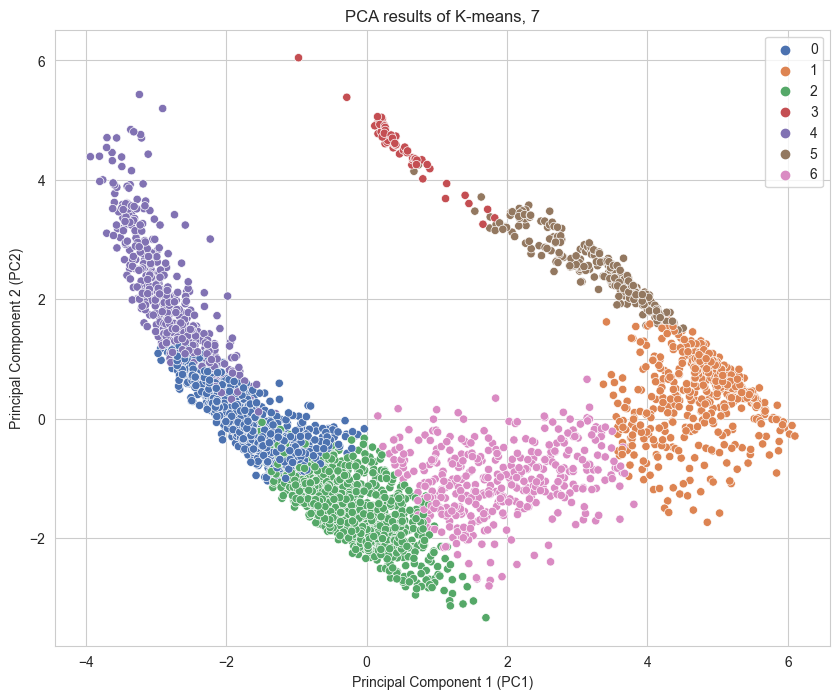

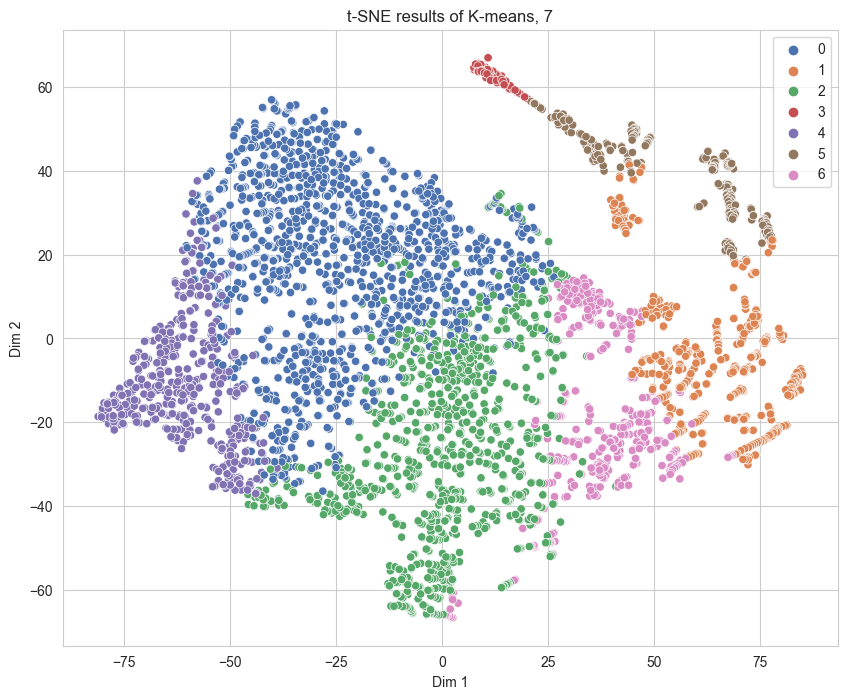

In [11]:
model = KMeans(n_clusters=7, random_state=0, n_init=100).fit(data_embed)
show_clustering_metrics(data_embed, model)
visualize_clusters(model, "K-means, 7")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                36912     
                                                                 
 dense_1 (Dense)             (None, 48)                2352      
                                                                 
 dense_2 (Dense)             (None, 48)                2352      
                                                                 
 dense_3 (Dense)             (None, 7)                 343       
                                                                 
Total params: 41,959
Trainable params: 41,959
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
134/134 [==============================] - 4s 4ms/step - loss: 0.9659 - accuracy: 0.6439
Epoch 2/100
134/134 [==============================] - 0s 4ms/step - loss: 0.2728 -

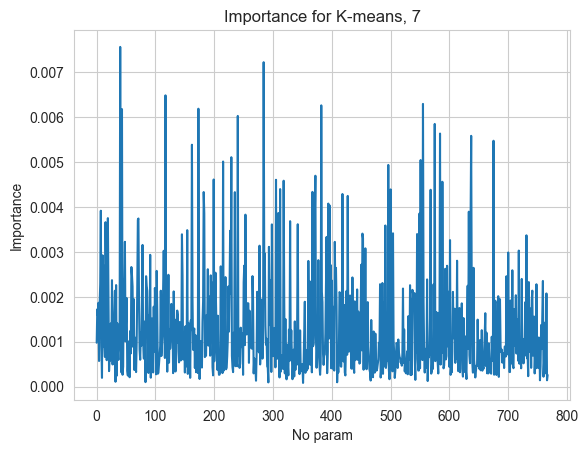

In [12]:
ann_model = Sequential([
    Dense(48, activation='relu', input_shape=(768,)),
    Dense(48, activation='relu'),
    Dense(48, activation='relu'),
    Dense(7, activation='softmax')
])

ann_model.summary()

ann_model.compile(loss="categorical_crossentropy",
                  metrics=["accuracy", ], optimizer="adam")

ann_model.fit(data_embed, pd.get_dummies(model.labels_), epochs=100)
loss_function = tf.keras.losses.categorical_crossentropy

with tf.GradientTape() as tape:
    inputs = tf.constant(data_embed, dtype=tf.float32)
    tape.watch(inputs)
    predictions = ann_model(inputs)
    loss = loss_function(pd.get_dummies(model.labels_), predictions)

gradients = tape.gradient(loss, inputs)
feature_importance = tf.reduce_mean(tf.abs(gradients), axis=0)
print(feature_importance.numpy())
draw_metrics(
    range(len(feature_importance.numpy())),
    feature_importance.numpy() / np.sum(feature_importance.numpy()),
    ylabel="Importance", xlabel="No param", title="K-means, 7"
)

In [13]:
var_inf_df = pd.DataFrame({
    "var_no": [f"var_{var_no}" for var_no in range(768)],
    "inform": feature_importance.numpy() / np.sum(feature_importance.numpy()),
})

var_inf_df = var_inf_df.sort_values(by="inform", ascending=False)
var_inf_df["cum_inf"] = var_inf_df["inform"].cumsum()
var_inf_df.head(10)

,var_no,inform,cum_inf
40,var_40,0.007564,0.007564
284,var_284,0.007223,0.014787
117,var_117,0.006485,0.021272
555,var_555,0.006294,0.027566
382,var_382,0.006263,0.033829
173,var_173,0.006188,0.040017
43,var_43,0.006178,0.046195
240,var_240,0.006027,0.052222
575,var_575,0.005848,0.058070
584,var_584,0.005635,0.063705


Top 5 parameters with the biggest impact on aimed cluster / class is
'var_40', 'var_284', 'var_117', 'var_555', 'var_382', so lets consider our attention on them

In [15]:
data_embed_top_5 = pd.DataFrame()
data_embed_top_5["var_40"] = data_embed["40"]
data_embed_top_5["var_284"] = data_embed["284"]
data_embed_top_5["var_117"] = data_embed["117"]
data_embed_top_5["var_555"] = data_embed["555"]
data_embed_top_5["var_382"] = data_embed["382"]
data_embed_top_5["cluster"] = model.labels_

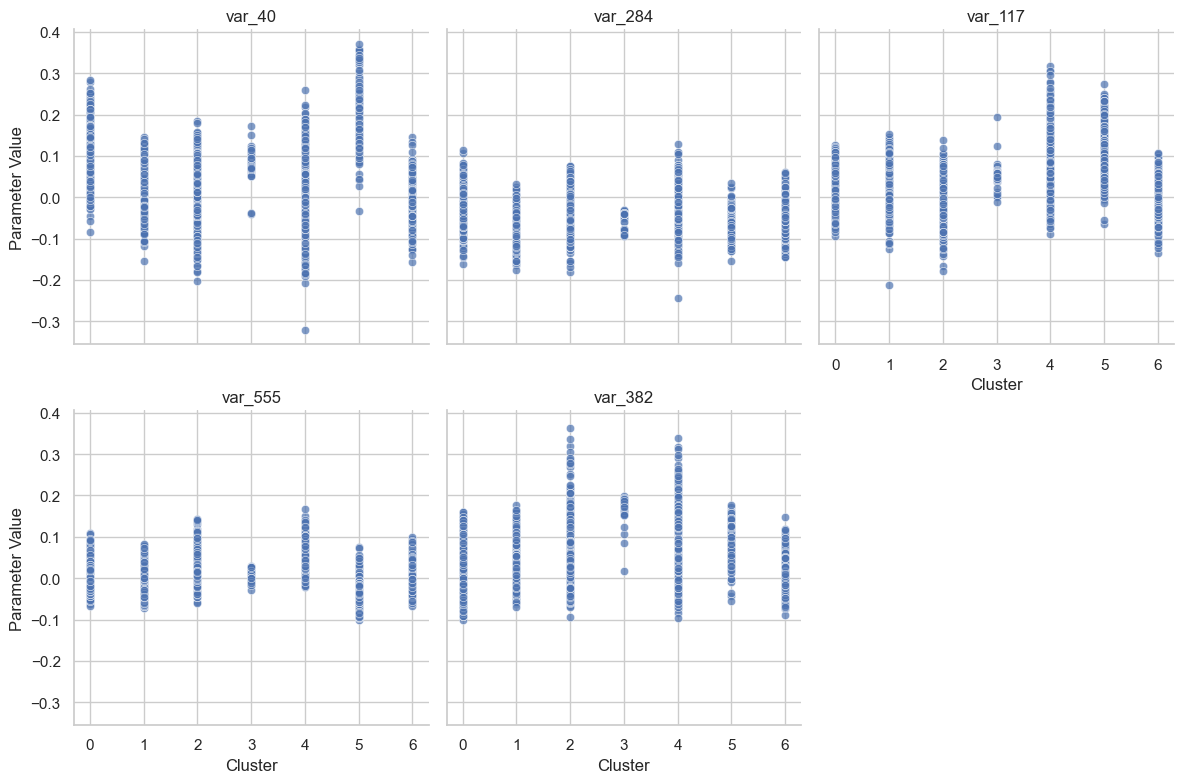

In [16]:
melted_df = pd.melt(data_embed_top_5, id_vars='cluster', var_name='parameter', value_name='value')

sns.set(style="whitegrid")

g = sns.FacetGrid(melted_df, col="parameter", col_wrap=3, height=4)
g.map(sns.scatterplot, "cluster", "value", alpha=0.7)
g.set_axis_labels("Cluster", "Parameter Value")
g.set_titles(col_template="{col_name}")
plt.show()

C:\Users\voldo\AppData\Local\Temp\ipykernel_26792\2632122596.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=melted_df, x='cluster', y='value', hue='parameter', ci=None, alpha=0.7)


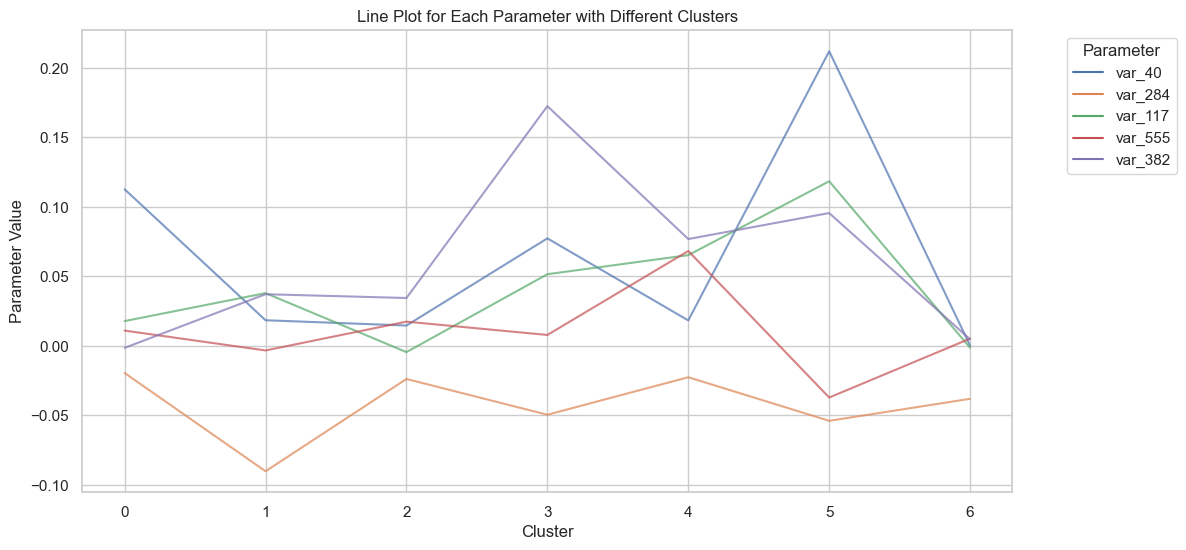

In [17]:
melted_df = pd.melt(data_embed_top_5, id_vars='cluster', var_name='parameter', value_name='value')

# Set the style of the plot
sns.set(style="whitegrid")

# Create a line plot for each parameter
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='cluster', y='value', hue='parameter', ci=None, alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('Parameter Value')
plt.title('Line Plot for Each Parameter with Different Clusters')
plt.legend(title='Parameter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

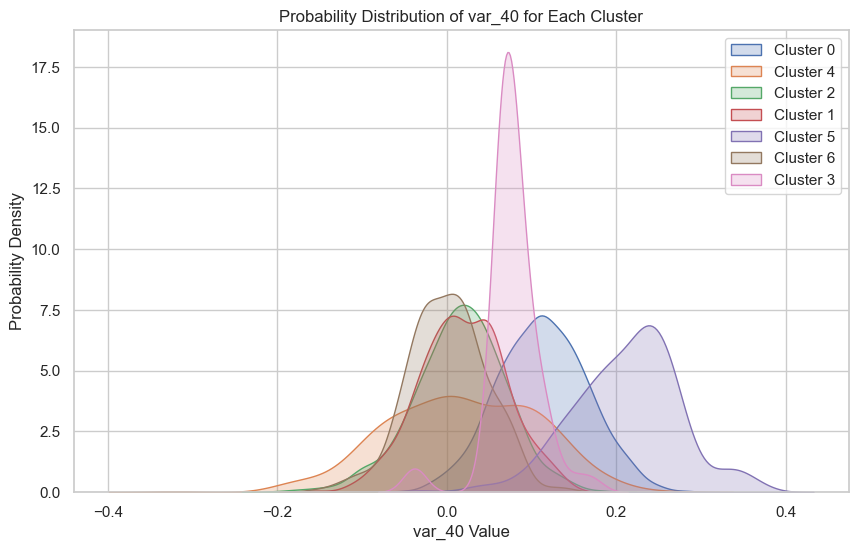

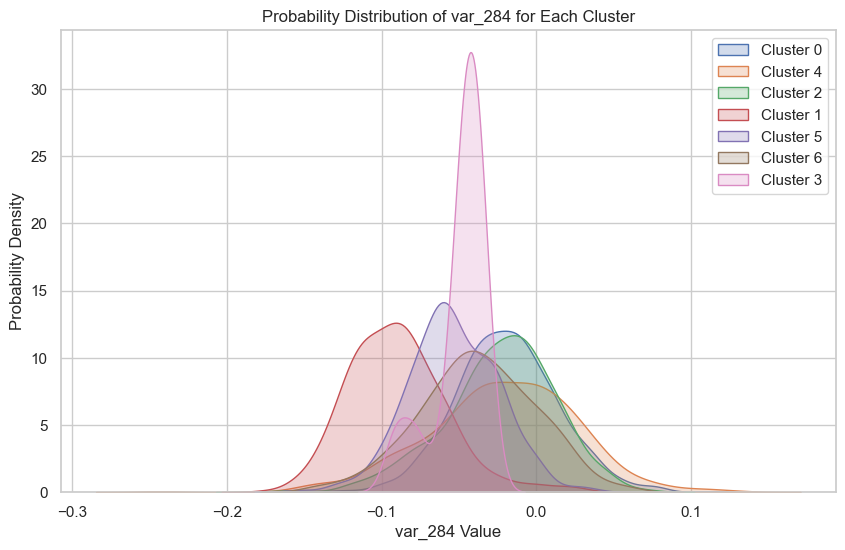

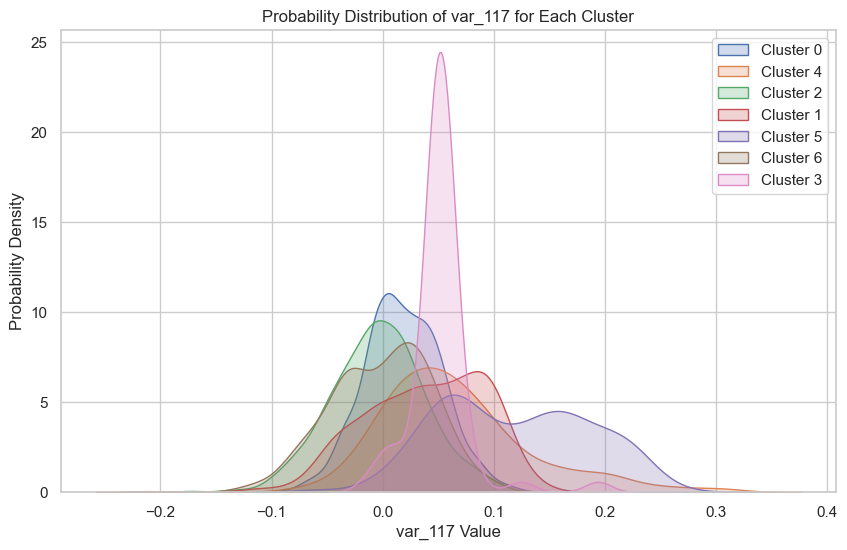

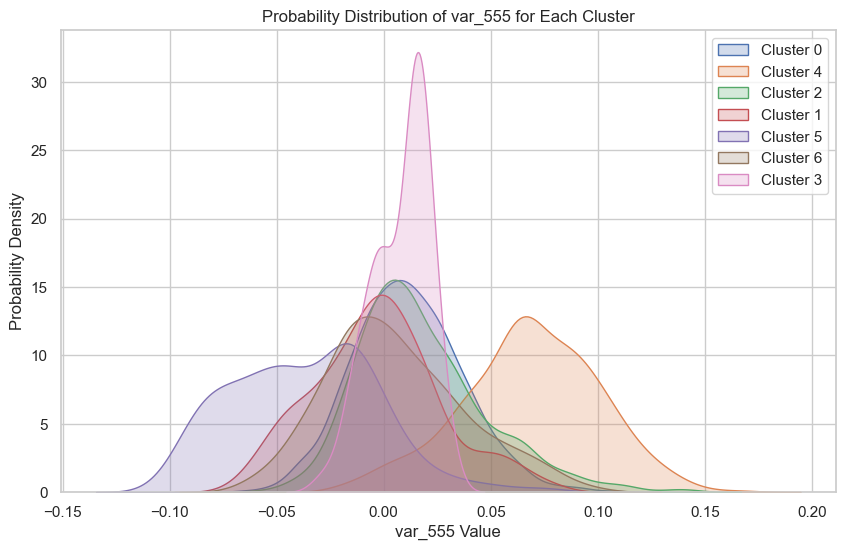

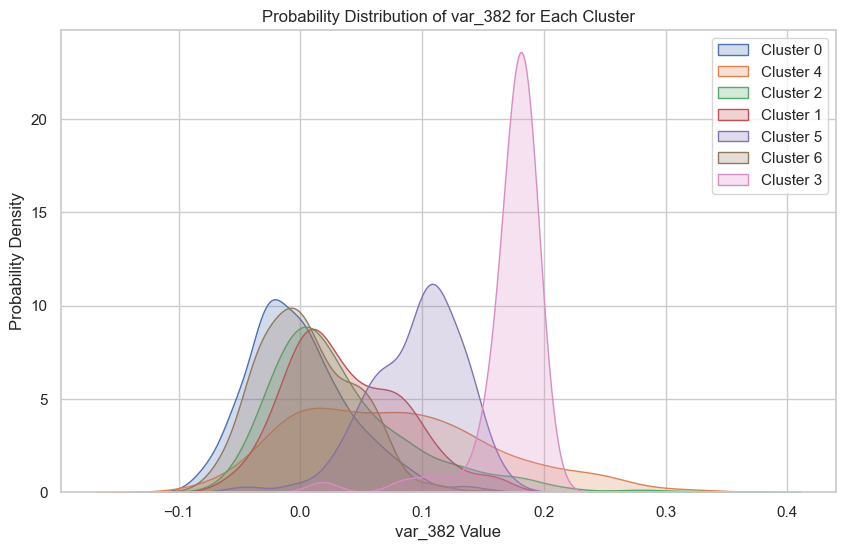

In [21]:
var_names = ['var_40', 'var_284', 'var_117', 'var_555', 'var_382']
for var_name in var_names:
    sns.set(style="whitegrid")

    plt.figure(figsize=(10, 6))
    for cluster in data_embed_top_5['cluster'].unique():
        cluster_data = data_embed_top_5[data_embed_top_5['cluster'] == cluster][var_name]
        sns.kdeplot(cluster_data, label=f'Cluster {cluster}', fill=True)
    
    plt.xlabel(f'{var_name} Value')
    plt.ylabel('Probability Density')
    plt.title(f'Probability Distribution of {var_name} for Each Cluster')
    plt.legend()
    plt.show()